In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import Counter
from itertools import islice

In [2]:
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location = 'C:/Windows/Fonts/gulim.ttc' 
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

%matplotlib inline

In [3]:
input_file_name = 'C:/Users/Playdata/pytest/contest/main_df.csv'
df = pd.read_csv(input_file_name, encoding= 'utf8')

In [4]:
df.head(5)

,file_name,MAIL_FROM,Received,Date,text_without_tag,include_url,num_of_imgs,Year,Month,Day,Time,length_of_text,main_language,Group,ip
0,059faa80-e6d3-47ff-8a45-edf0fba4e398.eml,juyoung@gmail.com,from [102.48.236.154] by 73.132.221.32 id <954...,"Mon, 16 Dec 2019 21:41:42 +0100",Content-Type: text/html;\nContent-Transfer-Enc...,1,0,2019.0,Dec,Mon,21.0,533.0,ko,A,102.48.236.154
1,059fd5ff-a546-4924-a6e9-a14f3bba805d.eml,suminy@outlook.kr,from [167.139.250.4] by 73.132.221.32 with ESM...,"Mon, 20 Apr 2020 22:38:31 -0200",Content-Type: text/html;\nContent-Transfer-Enc...,1,0,2020.0,Apr,Mon,22.0,509.0,ko,A,167.139.250.4
2,059fd98b-68f8-4722-8870-9671abfda544.eml,jisun@nate.com,from [211.204.37.3] by 73.132.221.32 with ESMT...,"Mon, 03 Feb 2020 11:41:18 -0600",Content-Type: text/html;\nContent-Transfer-Enc...,1,0,2020.0,Feb,Mon,11.0,527.0,ko,B,211.204.37.3
3,059ffd38-f893-46ff-b65d-2f70da33dd90.eml,yenjuy@outlook.kr,from [208.206.157.152] by 73.132.221.32 with E...,"Sun, 05 Apr 2020 22:39:19 +0300",Content-Type: text/html;\nContent-Transfer-Enc...,1,0,2020.0,Apr,Sun,22.0,217.0,ko,A,208.206.157.152
4,059ffe9c-b1a7-4b57-8174-8b0afe03366e.eml,noah@ajne.com,from localhost ([127.0.0.1]) by localhost via ...,"Tue, 21 Apr 2020 17:52:56 +0800",This message contained an attachment that was ...,0,0,2020.0,Apr,Tue,17.0,210.0,en,D,127.0.0.1


In [5]:
group = ['A', 'B', 'C', 'D']

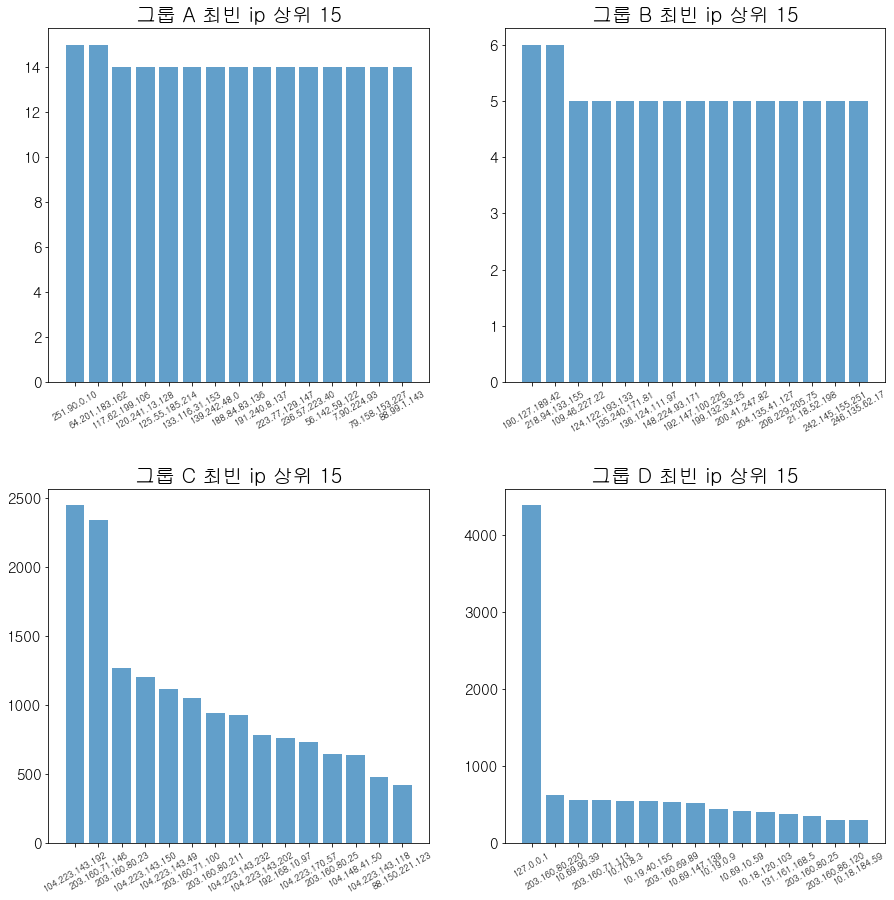

In [38]:
# 그룹별 최빈 15개의 ip와 해당 ip주소에서 발송된 메일의 수
f, ax = plt.subplots(2, 2, figsize=(15,15))
matplotlib.rc('font', size=15)

for i in range(2):
    for j in range(2):
        data = df[df['Group']==group[2*i+j]]
        ip_counter = Counter(data['ip'].dropna())
        top_15 = list(islice(sorted(ip_counter.items(),key=lambda x: (-x[1], x[0])), 15))
        labels, values = zip(*top_15)
        
        ax[i,j].bar(labels , values, alpha=0.7)
        ax[i,j].tick_params('x', labelsize=9,labelrotation=30 )
        ax[i,j].set_title('그룹 ' +group[2*i+j]+ ' 최빈 ip 상위 15', fontsize=20)

plt.subplots_adjust(hspace=0.3)
plt.savefig('group_graph/group_ip_top15.png', dpi=300)

In [52]:
#  최다 발송한 3개의 ip 주소에 대해서 언어 분석을 함.
c1 = df.loc[(df['Group']=='C') & (df['ip']=='104.223.143.192')  ]
c2 = df.loc[(df['Group']=='C') & (df['ip']=='203.160.71.146')  ]
d1 = df.loc[(df['Group']=='D') & (df['ip']=='127.0.0.1')  ]

In [60]:
c1_counter = Counter(c1['main_language'])
c2_counter = Counter(c2['main_language'])
d1_counter = Counter(d1['main_language'])

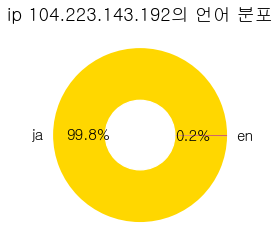

In [67]:
color = ['gold' , 'indianred', 'darkgoldenrod', 'lightseagreen', 'mediumseagreen']
plt.pie(c1_counter.values(), autopct='%1.1f%%', colors = color, labels=c1_counter.keys())

centre_circle = plt.Circle((0,0),0.4,color='white', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('ip 104.223.143.192의 언어 분포')
plt.savefig('group_graph/c1_lan.png', dpi=300)

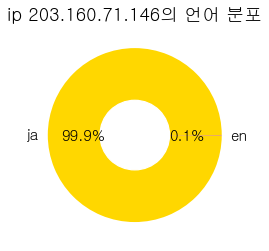

In [68]:
color = ['gold' , 'indianred', 'darkgoldenrod', 'lightseagreen', 'mediumseagreen']
plt.pie(c2_counter.values(), autopct='%1.1f%%', colors = color, labels=c2_counter.keys())

centre_circle = plt.Circle((0,0),0.4,color='white', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('ip 203.160.71.146의 언어 분포')
plt.savefig('group_graph/c2_lan.png', dpi=300)

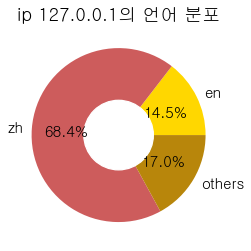

In [69]:
d1_counter2 = {}

for i in d1_counter.keys():
    if i =='zh':
        d1_counter2['zh'] = d1_counter['zh']
    elif i =='en':
        d1_counter2['en'] = d1_counter['en']
    else:
        try:
            d1_counter2['others'] += d1_counter[i]
        except:
            d1_counter2['others'] = d1_counter[i]


color = ['gold' , 'indianred', 'darkgoldenrod', 'lightseagreen', 'mediumseagreen']
plt.pie(d1_counter2.values(), autopct='%1.1f%%', colors = color, labels=d1_counter2.keys())

centre_circle = plt.Circle((0,0),0.4,color='white', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('ip 127.0.0.1의 언어 분포')
plt.savefig('group_graph/d1_lan.png', dpi=300)